In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from math import pi

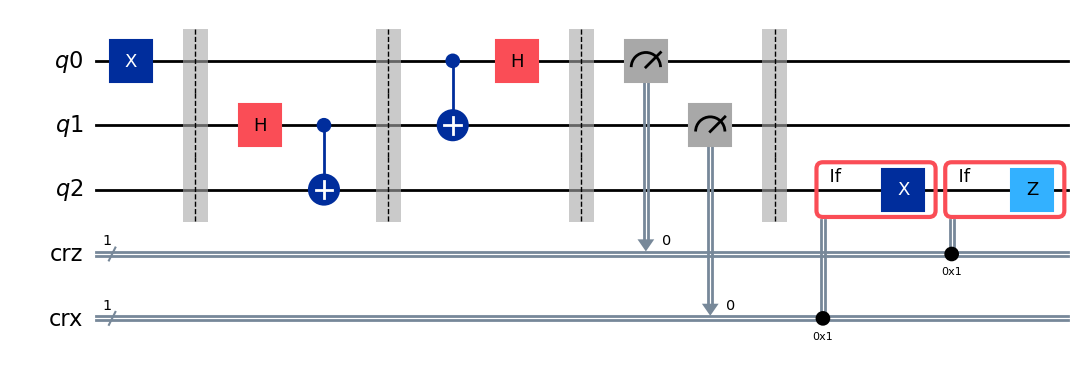

In [ ]:
# initialize 3-qubit circuit with named registers
q0 = QuantumRegister(1, name="q0") # Olivia's source qubit to teleport
q1 = QuantumRegister(1, name="q1") # middle qubit sent to Olivia (half of Bell state pair)
q2 = QuantumRegister(1, name="q2") # Barron's destination qubit (half of Bell state pair)

crz = ClassicalRegister(1, name="crz") # Olivia's measurement of her source qubit
crx = ClassicalRegister(1, name="crx") # Olivia's measurement of middle qubit (half of Bell state pair)

circuit = QuantumCircuit(q0, q1, q2, crz, crx)

# initialize Olivia's qubit (quantum state to teleport)
circuit.x(0)
circuit.barrier()

# create Bell state pair
circuit.h(q1)
circuit.cx(q1, q2)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(q0, q1)
circuit.h(q0)
circuit.barrier()
circuit.measure(q0, crz)
circuit.measure(q1, crx)
circuit.barrier()

# Barron transforms his qubit based on measurement results
with circuit.if_test((crx, 1)):
  circuit.x(q2)
with circuit.if_test((crz, 1)):
  circuit.z(q2)
# old qiskit:
# circuit.x(q2).c_if((crx, 1))  # apply X gate if cr_x is 1
# circuit.z(q2).c_if((crz, 1))  # apply Z gate if cr_z is 1

circuit.draw(output='mpl')

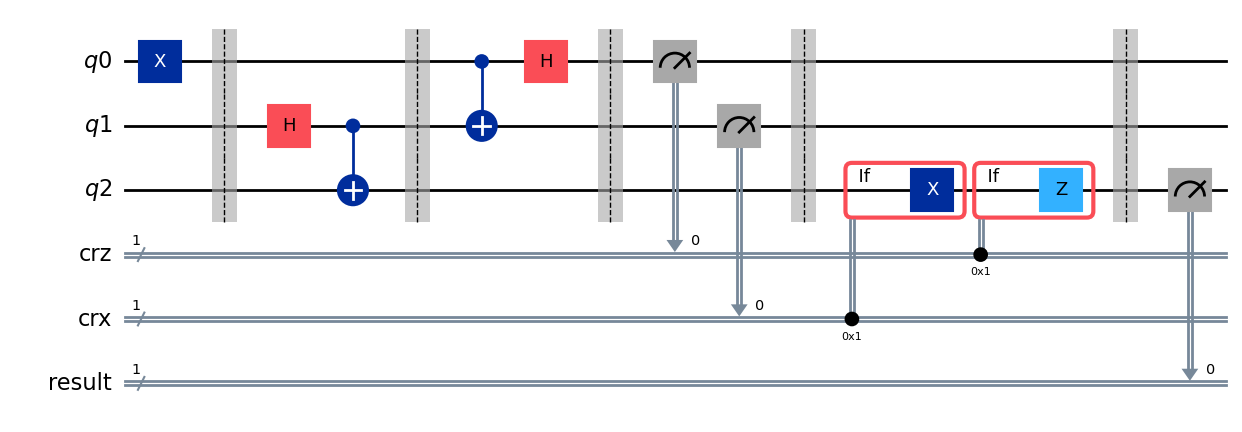

In [3]:
# add final measurement of Barron's qubit
cr_result = ClassicalRegister(1, name="result")
circuit.barrier()
circuit.add_register(cr_result)
circuit.measure(2, 2)
circuit.draw(output='mpl')

In [ ]:
# UPDATE UPDATE - use next cell that uses Aer Simulator - if_test() calls do not work with basic simulator
# # UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
# from qiskit.providers.basic_provider import BasicProvider
# simulator = BasicProvider().get_backend('basic_simulator')
# compiled_circuit = transpile(circuit, simulator)
# result = simulator.run(compiled_circuit).result()
# plot_histogram(result.get_counts())

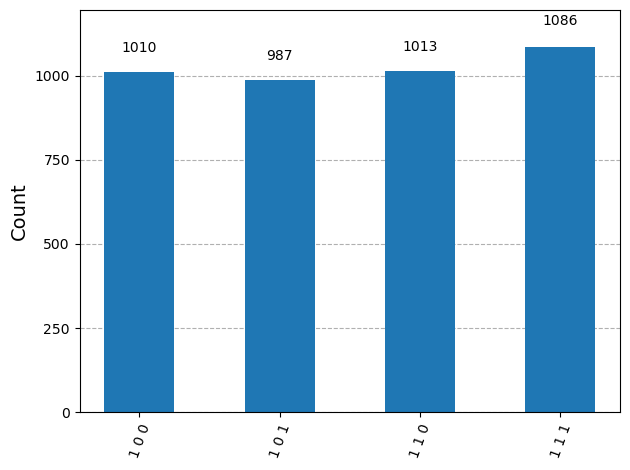

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=4096).result()
plot_histogram(result.get_counts())

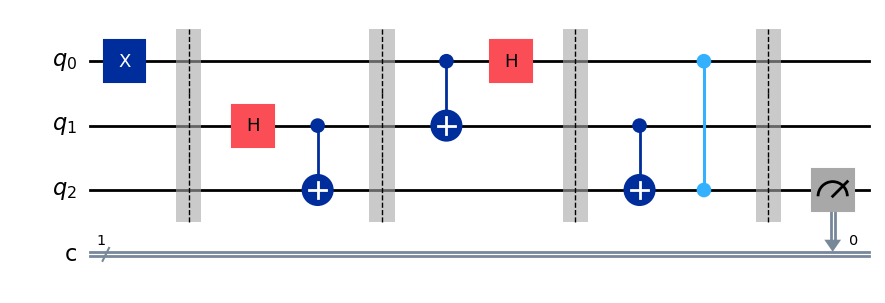

In [9]:
# quantum teleportation circuit using deferred measurement
circuit_def = QuantumCircuit(3, 1)

# initialize Olivia's qubit (quantum state to teleport)
circuit_def.x(0)
circuit_def.barrier()

# create Bell state pair
circuit_def.h(1)
circuit_def.cx(1, 2)
circuit_def.barrier()

# Olivia performs Bell state measurement
circuit_def.cx(0, 1)
circuit_def.h(0)
circuit_def.barrier()

# apply conditional operations on Barron's qubit
circuit_def.cx(1, 2)
circuit_def.cz(0, 2)
circuit_def.barrier()

# measure Barron's destination qubit
circuit_def.measure(2, 0)

circuit_def.draw(output='mpl')

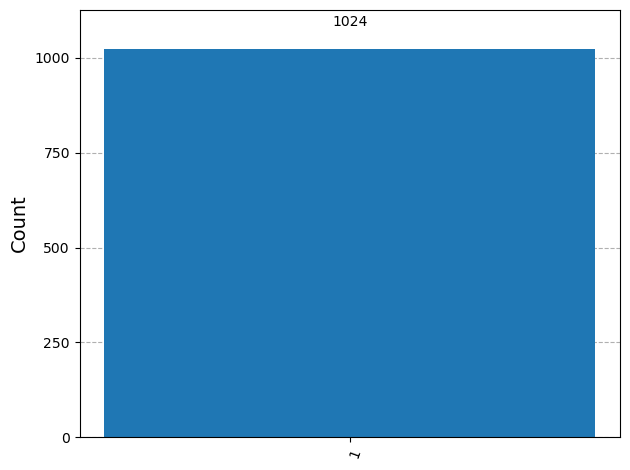

In [10]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit_def = transpile(circuit_def, simulator)
result_def = simulator.run(compiled_circuit_def).result()
plot_histogram(result_def.get_counts())